In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sc

ModuleNotFoundError: No module named 'scipy'

(3, 2) (100, 2)


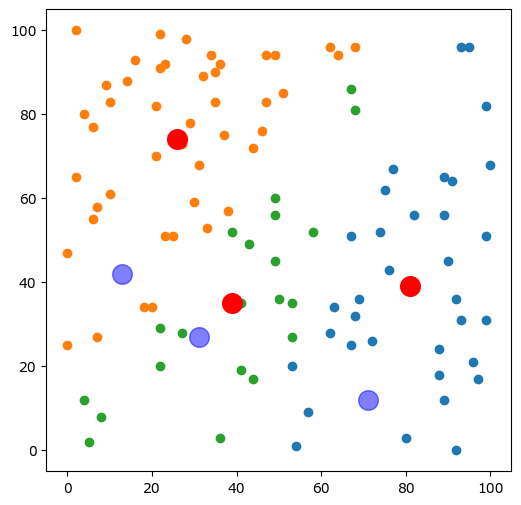

In [3]:
# k-means clustering:

plt.figure(figsize=(6, 6))

# step 1
k = 3
data = np.random.randint(0,101, size = (100, 2)) # generates 100 2d points in range 0-100
centroids = np.random.randint(0,101, size = (k, 2)) # generates 3 2d points as the catigories
print(centroids.shape, data.shape)
# step 2: computign the distances
dists = np.zeros((data.shape[0], k))
for i in range(k):
    dists[:,i] = np.sum((data - centroids[i,:])**2, axis = 1)

# step 3: choosing the nearest centroid
groupidx = np.argmin(dists, axis = 1)

plt.scatter(centroids[:, 0], centroids[:, 1], c='blue', s=200, label='Centroids', alpha = .5)
# step 4: recompute centroids
for i in range(k):
    centroids[i,:] = [
        np.mean(data[groupidx == i, 0]),
        np.mean(data[groupidx == i, 1])
    ]

for i in range(k):
    points_of_this_catg = data[groupidx == i]
    plt.scatter(points_of_this_catg[:, 0], points_of_this_catg[:, 1])

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids')
plt.show()


In [4]:
# exercises:

# ex 1:

def mean_center(vec1, vec2):
    x = vec1 - np.mean(vec1)
    y = vec2 - np.mean(vec2)
    return x, y

def pearson(vec1, vec2):
    vec1, vec2 = mean_center(vec1, vec2)
    nor1, nor2 = np.linalg.norm(vec1), np.linalg.norm(vec2)
    if nor1 == 0 or nor2 == 0:
        return 0
    return np.dot(vec1, vec2) / (nor1 * nor2)

def cos(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

v = np.array([1,2,3,4])
u = np.array([10001,10002,10003,10004])
print(pearson(v, u))
print(cos(v, u))


0.9999999999999998
0.9129165556108244


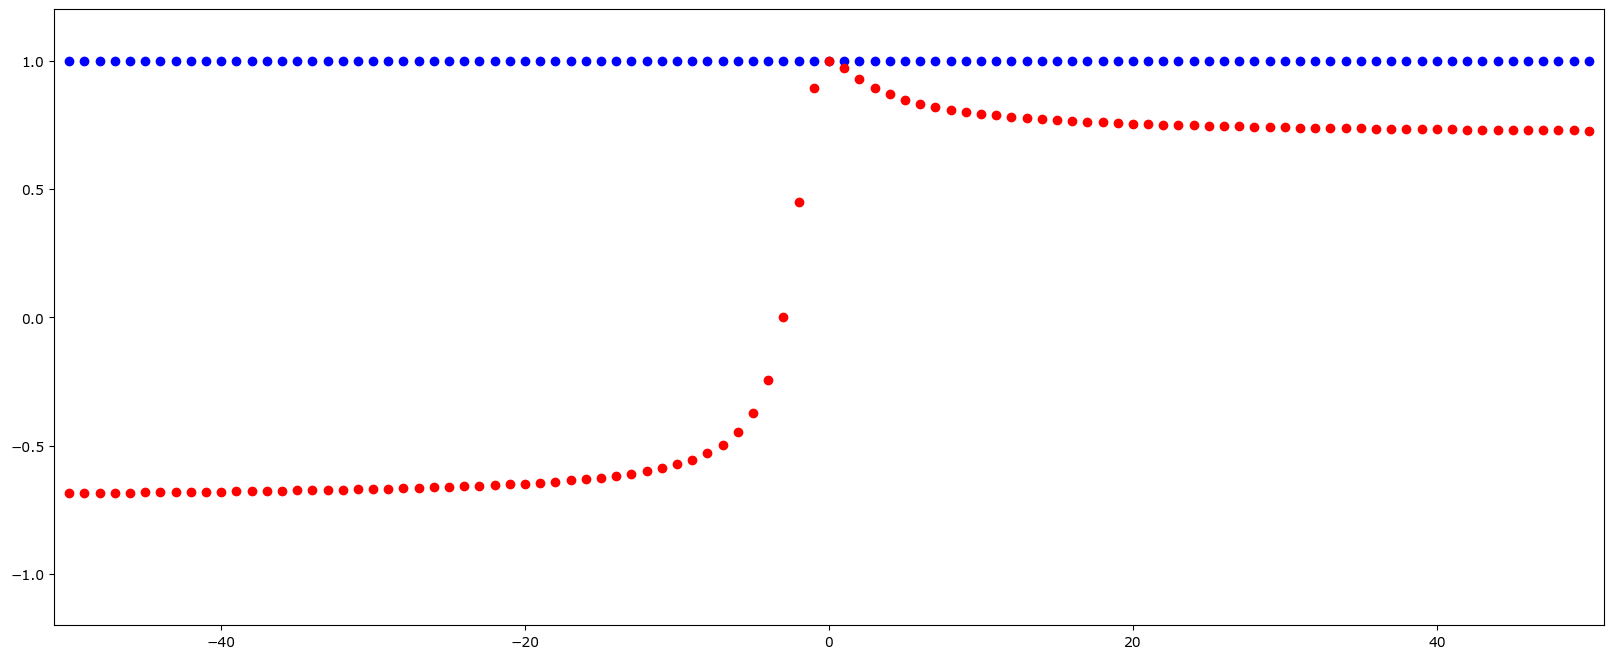

In [5]:
# ex 2:

x = np.array([0, 3])
y = x - 50

p = plt.figure(figsize=(20, 8))
plt.scatter(-50, pearson(x, y), color = 'blue')
plt.scatter(-50, cos(x, y), color = 'red')
plt.xlim(-51, 51)
plt.ylim(-1.2, 1.2)

for i in range(-49, 51):
    y = x + i
    plt.scatter(i, pearson(x, y), color = 'blue')
    plt.scatter(i, cos(x, y), color = 'red')



In [18]:
# ex 3:

??sc.stats.pearsonr


Signature: sc.stats.pearsonr(x, y, *, alternative='two-sided', method=None)
Source:   
def pearsonr(x, y, *, alternative='two-sided', method=None):
    r"""
    Pearson correlation coefficient and p-value for testing non-correlation.

    The Pearson correlation coefficient [1]_ measures the linear relationship
    between two datasets. Like other correlation
    coefficients, this one varies between -1 and +1 with 0 implying no
    correlation. Correlations of -1 or +1 imply an exact linear relationship.
    Positive correlations imply that as x increases, so does y. Negative
    correlations imply that as x increases, y decreases.

    This function also performs a test of the null hypothesis that the
    distributions underlying the samples are uncorrelated and normally
    distributed. (See Kowalski [3]_
    for a discussion of the effects of non-normality of the input on the
    distribution of the correlation coefficient.)
    The p-value roughly indicates the probability of an u

In [6]:
# ex 4:

# our fun is pearson:
t1 = time.time()
for _ in range (1000):
    x, y = np.random.randint(0, 100, size = 500),  np.random.randint(0, 100, size = 500)
    pearson(x, y)
t1 = time.time() - t1

t2 = time.time()
for _ in range (1000):
    x, y = np.random.randint(0, 100, size = 500),  np.random.randint(0, 100, size = 500)
    np.corrcoef(x, y)
t2 = time.time() - t2

print(t1, t2) # the two times
print( 1 - (t1 / t2) ) # the percentage of time we save using our func

0.034147024154663086 0.04371285438537598
0.21883334696882928


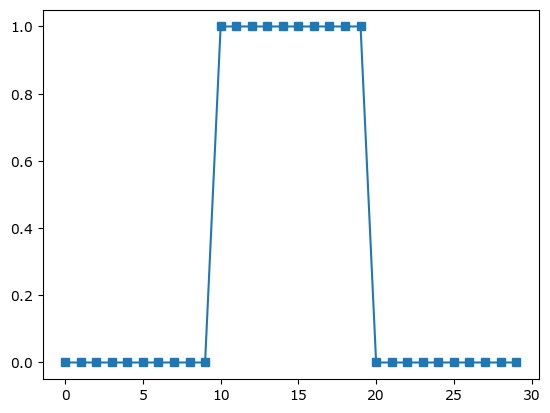

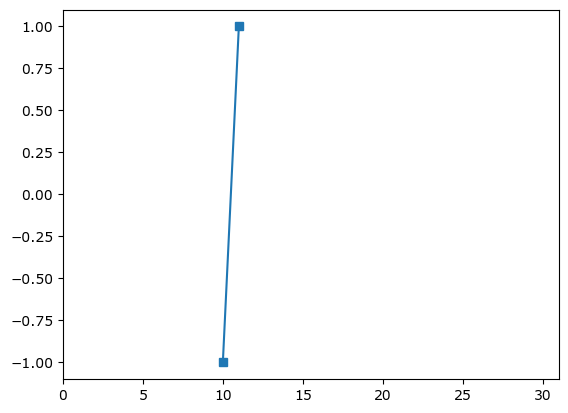

In [32]:
# ex 5:

kernel = np.array([-1,1])
time = np.arange(0, 30, 1)
series = np.hstack((np.array([0]*10), np.array([1]*10), np.array([0]*10)))

plt.plot(time, series, linestyle='-', marker = 's')
plt.show()

plt.plot([10,11], kernel, linestyle = '-', marker = 's')
plt.xlim(0, 31)
plt.show()


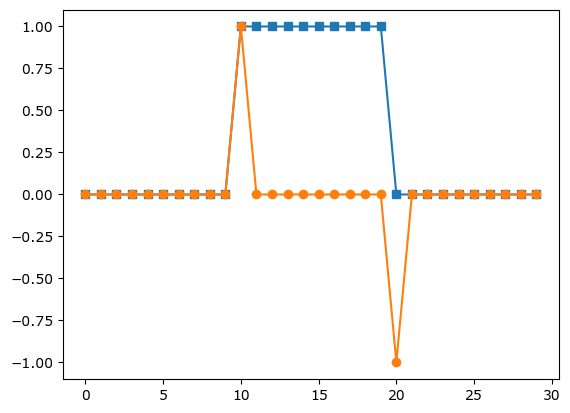

In [33]:
# cont ex 5:

detector = [0]
for i in range(1, time.shape[0]):
    d = np.dot(kernel, [series[i-1], series[i]])
    detector.append(d)


plt.plot(time, series, linestyle='-', marker = 's')
plt.plot(time, detector, marker = 'o')
plt.show()



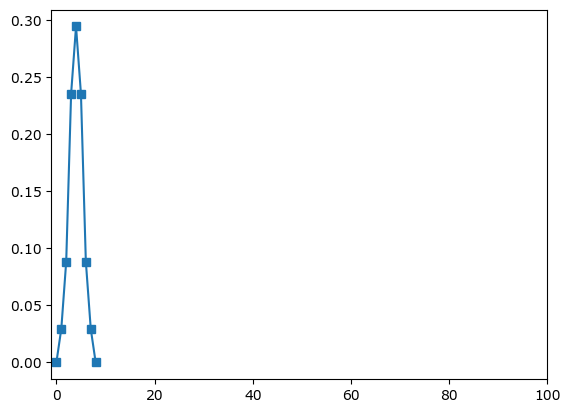

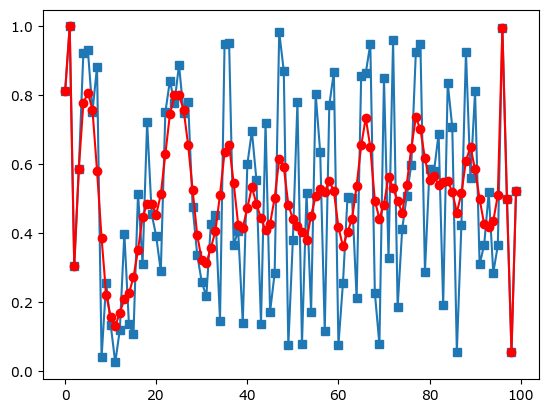

In [34]:
# ex 6:

kernel = np.array([0, .1, .3, .8, 1, .8, .3, .1, 0])
kernel /= np.sum(kernel)
time = np.arange(0, 100, 1)
series = np.random.rand(100)
hker = int(kernel.shape[0] / 2)
smoothed = series.copy()
for i in range(hker, time.shape[0] - hker):
    d = np.dot(kernel, series[i-hker:i + hker+1])
    smoothed[i] = d


plt.plot(time[0:9], kernel, linestyle = '-', marker = 's')
plt.xlim(-1, time.shape[0])
plt.show()


plt.plot(time, series, linestyle='-', marker = 's')
plt.plot(time, smoothed, marker = 'o', color = 'red')
plt.show()




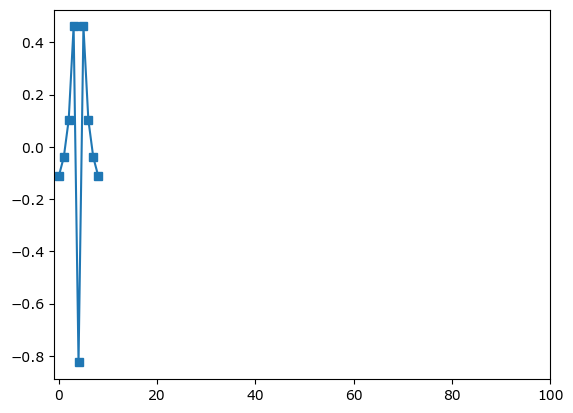

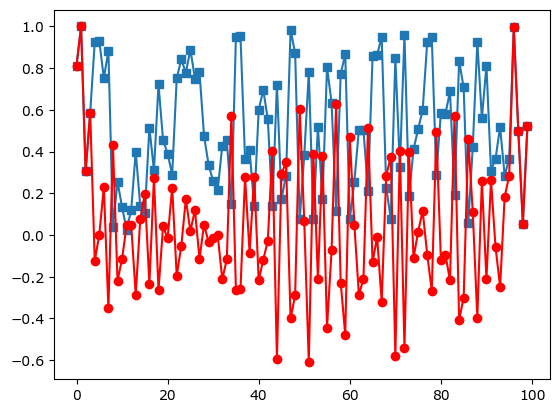

In [35]:
# ex 7:

kernel = np.array([0, .1, .3, .8, -1, .8, .3, .1, 0])
kernel /= np.sum(kernel)
kernel -= np.mean(kernel)

for i in range(hker, time.shape[0] - hker):
    d = np.dot(kernel, series[i-hker:i + hker+1])
    smoothed[i] = d

plt.plot(time[0:9], kernel, linestyle = '-', marker = 's')
plt.xlim(-1, time.shape[0])
plt.show()


plt.plot(time, series, linestyle='-', marker = 's')
plt.plot(time, smoothed, marker = 'o', color = 'red')
plt.show()


[ 64  35 121]
(3, 2) (150, 2)
(150, 3)


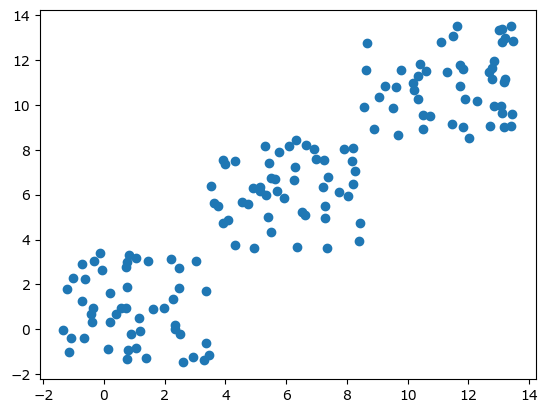

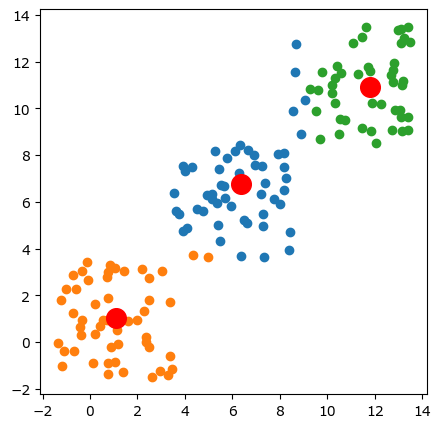

[[ 6.36038277  6.75984742]
 [ 1.08212534  1.02889179]
 [11.7895152  10.93241525]]
first cat has: (53,) points
second cat has: (52,) points
third cat has: (45,) points
(150, 3)


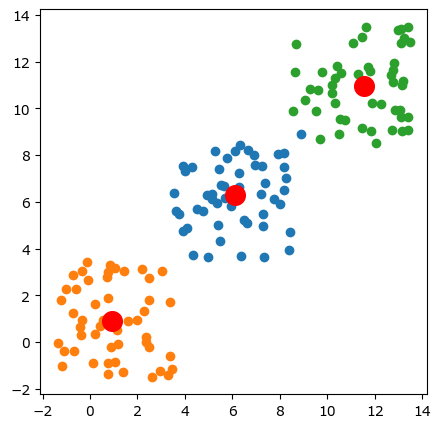

[[ 6.10671718  6.29591502]
 [ 0.93975038  0.92270844]
 [11.5401815  10.94909968]]
first cat has: (51,) points
second cat has: (50,) points
third cat has: (49,) points
(150, 3)


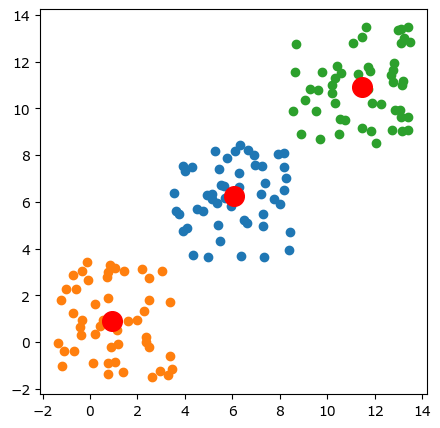

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points
(150, 3)


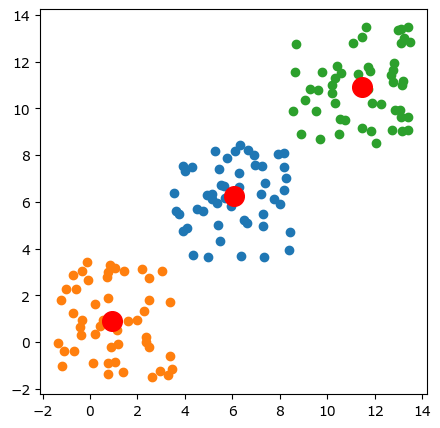

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points
(150, 3)


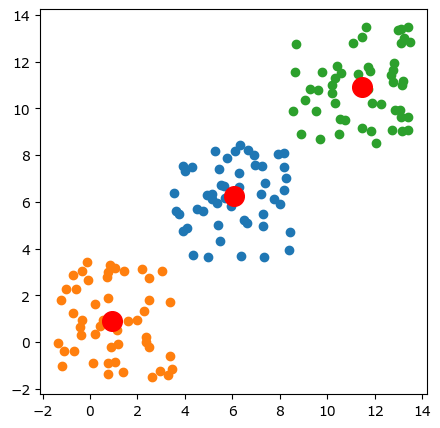

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points
(150, 3)


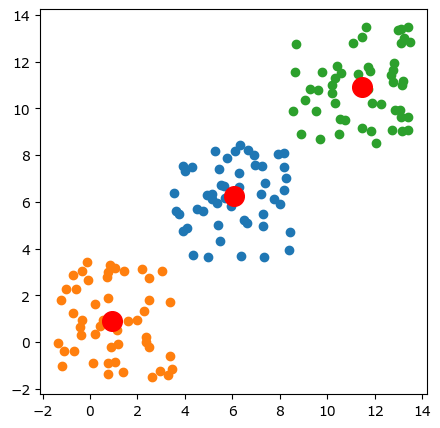

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points
(150, 3)


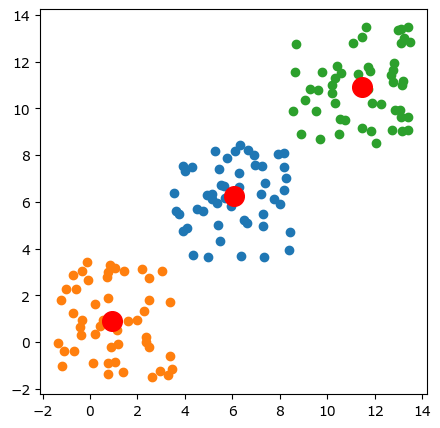

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points
(150, 3)


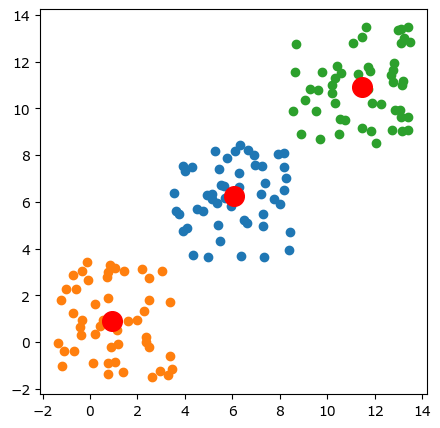

[[ 6.05122697  6.24345256]
 [ 0.93975038  0.92270844]
 [11.48700242 10.90849845]]
first cat has: (50,) points
second cat has: (50,) points
third cat has: (50,) points


In [36]:
# ex 8: 

k = 3
points = [[1, 1], [6 ,6], [11,11]]

a = [points[0][0] + 5*(np.random.rand(50) - .5), points[0][1]+5*(np.random.rand(50) - .5)]
b = [points[1][0] +5*(np.random.rand(50) - .5), points[1][1]+5*(np.random.rand(50) - .5)]
c = [points[2][0] + 5*(np.random.rand(50) - .5), points[2][1]+5*(np.random.rand(50) - .5)]
d = np.random.randint(0, 150,3)
print(d)
data = np.hstack((a, b, c)).T
centroids = np.array([data[d[0],:], data[d[1],:], data[d[2],:]])
plt.scatter(data[:,0], data[:,1])
print(centroids.shape, data.shape)


for _ in range(8):
    dists = np.zeros((data.shape[0], k))
    print(dists.shape)
    for i in range(k):
        dists[:,i] = np.sum((data - centroids[i,:])**2, axis = 1)
    
    groupidx = np.argmin(dists, axis = 1)
    
    plt.figure(figsize=(5, 5))
    for i in range(k):
        centroids[i,:] = [
            np.mean(data[groupidx == i, 0]),
            np.mean(data[groupidx == i, 1])
        ]
    
    for i in range(k):
        points_of_this_catg = data[groupidx == i]
        plt.scatter(points_of_this_catg[:, 0], points_of_this_catg[:, 1])
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids')
    plt.show()
    print(centroids)
    print(f"first cat has: {data[groupidx == 0, 1].shape} points")
    print(f"second cat has: {data[groupidx == 1,1].shape} points")
    print(f"third cat has: {data[groupidx == 2,1].shape} points")




[70 11 66]
(2, 2) (150, 2)
(150, 2)


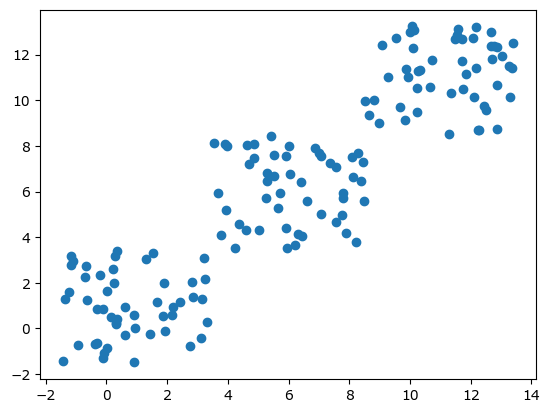

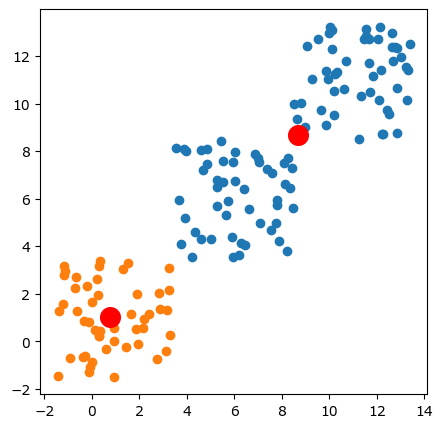

[[8.68154922 8.66062714]
 [0.74220163 1.01153819]]
first cat has: (100,) points
second cat has: (50,) points
third cat has: (0,) points
(150, 2)


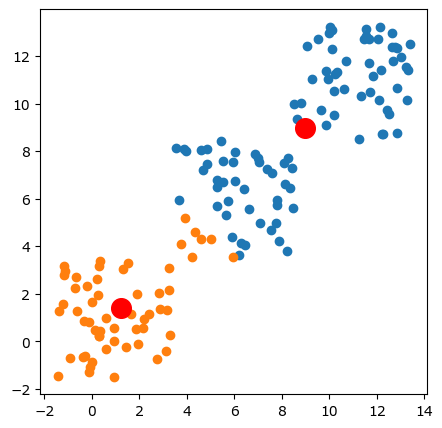

[[8.99236896 8.99448014]
 [1.21008228 1.40619246]]
first cat has: (93,) points
second cat has: (57,) points
third cat has: (0,) points
(150, 2)


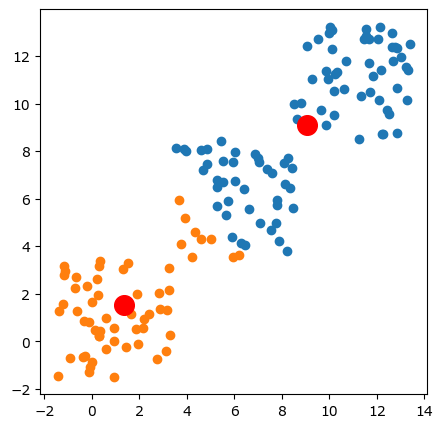

[[9.08134486 9.08687456]
 [1.3366546  1.52091592]]
first cat has: (91,) points
second cat has: (59,) points
third cat has: (0,) points
(150, 2)


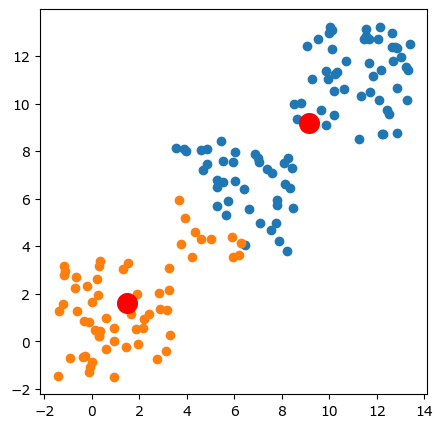

[[9.1482247  9.19534607]
 [1.49300008 1.61071842]]
first cat has: (89,) points
second cat has: (61,) points
third cat has: (0,) points
(150, 2)


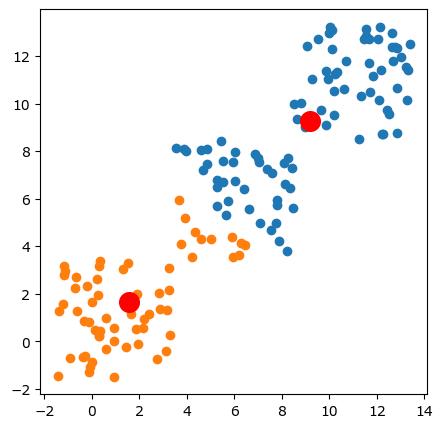

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
(150, 2)


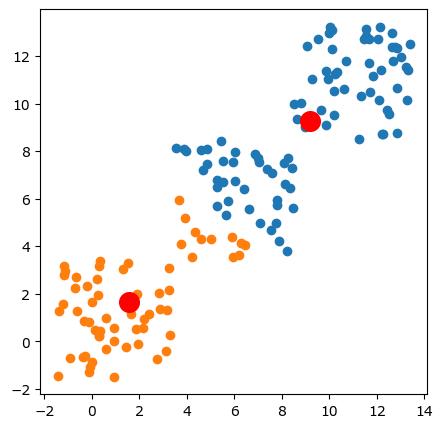

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
(150, 2)


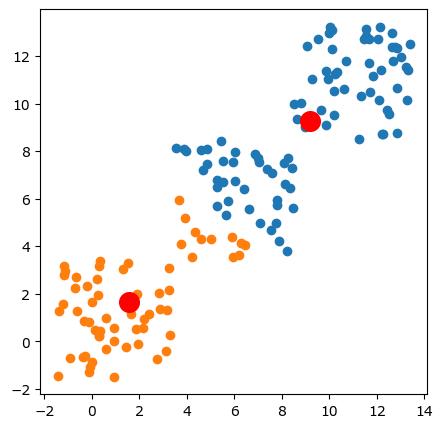

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
(150, 2)


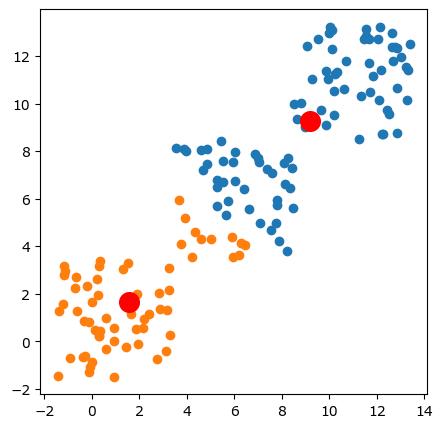

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
(150, 2)


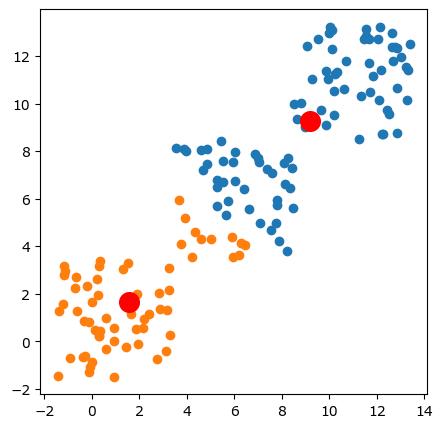

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
(150, 2)


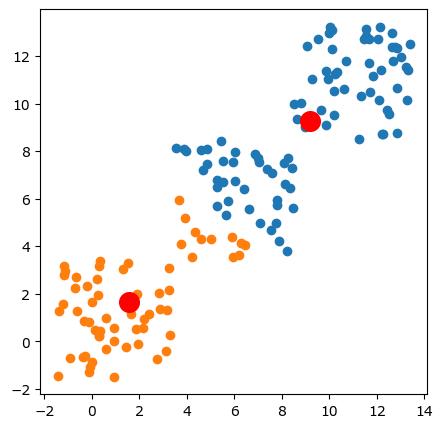

[[9.17891293 9.25396982]
 [1.57291396 1.64984322]]
first cat has: (88,) points
second cat has: (62,) points
third cat has: (0,) points
it's so bad clustering as sometimes points are not well ballanced between cats
that shows the importance of selecting the optimal number of centriods


In [37]:
# ex 9:

k = 2
points = [[1, 1], [6 ,6], [11,11]]

a = [points[0][0] + 5*(np.random.rand(50) - .5), points[0][1]+5*(np.random.rand(50) - .5)]
b = [points[1][0] +5*(np.random.rand(50) - .5), points[1][1]+5*(np.random.rand(50) - .5)]
c = [points[2][0] + 5*(np.random.rand(50) - .5), points[2][1]+5*(np.random.rand(50) - .5)]
d = np.random.randint(0, 150,3)
print(d)
data = np.hstack((a, b, c)).T
centroids = np.array([data[d[0],:], data[d[1],:]])
plt.scatter(data[:,0], data[:,1])
print(centroids.shape, data.shape)


for _ in range(10):
    dists = np.zeros((data.shape[0], k))
    print(dists.shape)
    for i in range(k):
        dists[:,i] = np.sum((data - centroids[i,:])**2, axis = 1)
    
    groupidx = np.argmin(dists, axis = 1)
    
    plt.figure(figsize=(5, 5))
    for i in range(k):
        centroids[i,:] = [
            np.mean(data[groupidx == i, 0]),
            np.mean(data[groupidx == i, 1])
        ]
    
    for i in range(k):
        points_of_this_catg = data[groupidx == i]
        plt.scatter(points_of_this_catg[:, 0], points_of_this_catg[:, 1])
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, label='Centroids')
    plt.show()
    print(centroids)
    print(f"first cat has: {data[groupidx == 0, 1].shape} points")
    print(f"second cat has: {data[groupidx == 1,1].shape} points")
    print(f"third cat has: {data[groupidx == 2,1].shape} points")

print("it's so bad clustering as sometimes points are not well ballanced between cats")
print("that shows the importance of selecting the optimal number of centriods")





